In [2]:
import matplotlib.pyplot as plt

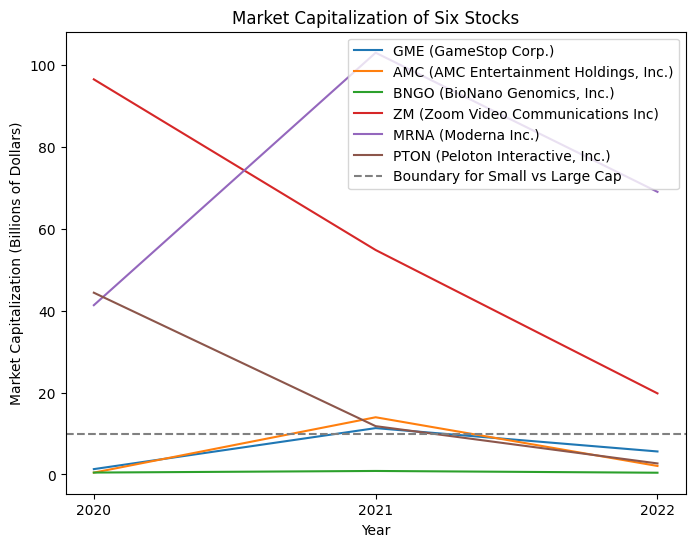

In [13]:
# Define the data for the six stocks
stocks = [
    {"stock": "GameStop Corp.", "ticker": "GME", "2020_market_cap": 1.31, "2021_market_cap": 11.32, "2022_market_cap": 5.62},
    {"stock": "AMC Entertainment Holdings, Inc.", "ticker": "AMC", "2020_market_cap": 0.45, "2021_market_cap": 13.97, "2022_market_cap": 2.08},
    {"stock": "BioNano Genomics, Inc.", "ticker": "BNGO", "2020_market_cap": 0.47, "2021_market_cap": 0.86, "2022_market_cap": 0.43},
    {"stock": "Zoom Video Communications Inc", "ticker": "ZM", "2020_market_cap": 96.47, "2021_market_cap": 54.8, "2022_market_cap": 19.8},
    {"stock": "Moderna Inc.", "ticker": "MRNA", "2020_market_cap": 41.33, "2021_market_cap": 102.97, "2022_market_cap": 69},
    {"stock": "Peloton Interactive, Inc.", "ticker": "PTON", "2020_market_cap": 44.38, "2021_market_cap": 11.8, "2022_market_cap": 2.7}
]

# Set up the plot
plt.figure(figsize=(8,6))
plt.title("Market Capitalization of Six Stocks")
plt.xlabel("Year")
plt.ylabel("Market Capitalization (Billions of Dollars)")

# Plot the data for each stock
for s in stocks:
    x = [2020, 2021, 2022]
    y = [s["2020_market_cap"], s["2021_market_cap"], s["2022_market_cap"]]
    plt.plot(x, y, label=s["ticker"] + " (" + s["stock"] + ")")
    plt.xticks(x)

# Add horizontal line for small cap/ large cap
plt.axhline(y=10, color='gray', linestyle='--', label="Boundary for Small vs Large Cap")

# Add a legend and show the plot
plt.legend()
plt.savefig('market_cap.png')
plt.show()

# Relative percentage change

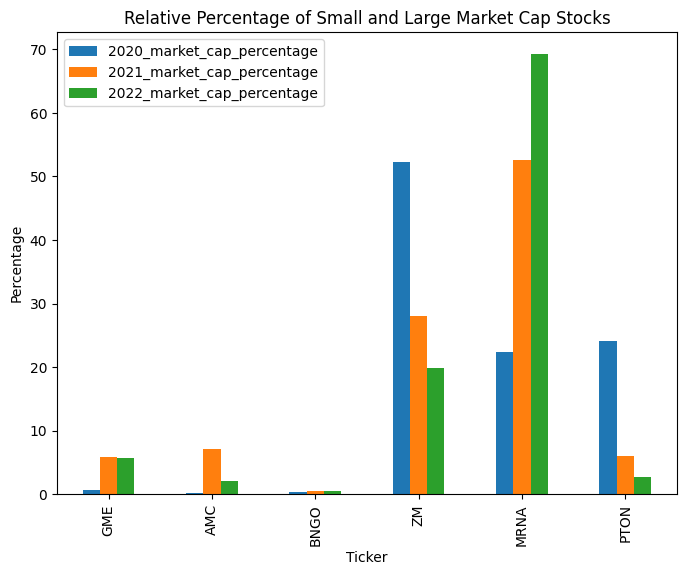

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = [
    {"stock": "GameStop Corp.", "ticker": "GME", "2020_market_cap": 1.31, "2021_market_cap": 11.32, "2022_market_cap": 5.62},
    {"stock": "AMC Entertainment Holdings, Inc.", "ticker": "AMC", "2020_market_cap": 0.45, "2021_market_cap": 13.97, "2022_market_cap": 2.08},
    {"stock": "BioNano Genomics, Inc.", "ticker": "BNGO", "2020_market_cap": 0.47, "2021_market_cap": 0.86, "2022_market_cap": 0.43},
    {"stock": "Zoom Video Communications Inc", "ticker": "ZM", "2020_market_cap": 96.47, "2021_market_cap": 54.8, "2022_market_cap": 19.8},
    {"stock": "Moderna Inc.", "ticker": "MRNA", "2020_market_cap": 41.33, "2021_market_cap": 102.97, "2022_market_cap": 69},
    {"stock": "Peloton Interactive, Inc.", "ticker": "PTON", "2020_market_cap": 44.38, "2021_market_cap": 11.8, "2022_market_cap": 2.7}
]

# convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(stocks)

# calculate the total market cap for each year
total_market_cap_2020 = df["2020_market_cap"].sum()
total_market_cap_2021 = df["2021_market_cap"].sum()
total_market_cap_2022 = df["2022_market_cap"].sum()

# calculate the market cap percentage for each stock
df["2020_market_cap_percentage"] = df["2020_market_cap"] / total_market_cap_2020 * 100
df["2021_market_cap_percentage"] = df["2021_market_cap"] / total_market_cap_2021 * 100
df["2022_market_cap_percentage"] = df["2022_market_cap"] / total_market_cap_2022 * 100

# create a new DataFrame with only the small and large market cap percentages
market_cap_percentages = df[["ticker", "2020_market_cap_percentage", "2021_market_cap_percentage", "2022_market_cap_percentage"]]

# set the index to the ticker
market_cap_percentages.set_index("ticker", inplace=True)

# plot the relative percentage for small and large market cap stocks
market_cap_percentages.plot(kind="bar", figsize=(8, 6))
plt.title("Relative Percentage of Small and Large Market Cap Stocks")
plt.xlabel("Ticker")
plt.ylabel("Percentage")
plt.show()


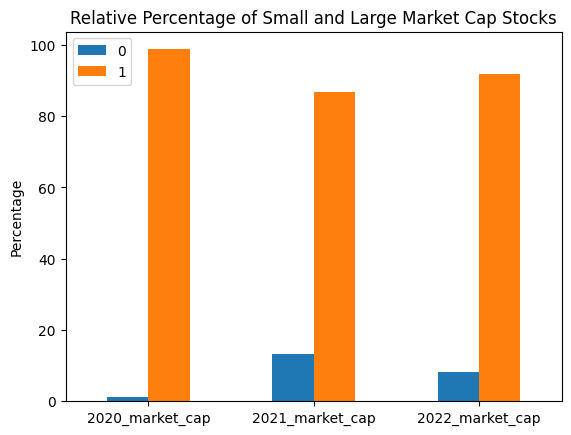

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('stock_market_cap.csv')

# Group the data by the primary_market_cap_group and calculate the sum of market caps for each group
market_cap_sum = df.groupby('primary_market_cap_group')[['2020_market_cap', '2021_market_cap', '2022_market_cap']].sum()

# Calculate the relative percentage for small and large market cap groups
small_cap_pct = market_cap_sum.loc['small'] / market_cap_sum.sum() * 100
large_cap_pct = market_cap_sum.loc['large'] / market_cap_sum.sum() * 100

# Create a bar plot to visualize the relative percentage for small and large market cap groups
ax = pd.concat([small_cap_pct, large_cap_pct], axis=1).plot(kind='bar', rot=0)
ax.set_ylabel('Percentage')
ax.set_title('Relative Percentage of Small and Large Market Cap Stocks')
plt.show()
